# Bike Sharing Demand Prediction - Linear Regression

## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BikeIndia aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal:

To model the demand for shared bikes with the available independent variables, which will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# 1. Import required libraries

In [1]:
import pandas as pd # Importing pandas library to import and process data
import matplotlib.pyplot as plt # Importing matplotib to plot graphs and visualize data
import seaborn as sns # Importing seaborn to plot graphs and visualize data
from sklearn.model_selection import train_test_split # Importing scikit learn train_test_split to split data into training and test data
from sklearn.linear_model import LinearRegression # Importing scikit learn LinearRegression for model building
from sklearn.feature_selection import RFE # Importing scikit learn RFE to select features
from sklearn.preprocessing import MinMaxScaler # Importing scikit learn MinMaxScaler to scale features
from sklearn.metrics import r2_score # Importing scikit learn r2_score to evaluate model score
from statsmodels.stats.outliers_influence import variance_inflation_factor # Importing statsmodels variance_inflation_factor module to compute VIF
import statsmodels.api as sm # Importing statsmodels api to train model

import warnings # Importing warnings module to control warnings 
warnings.filterwarnings('ignore') # Setting warnings to be ignored

# 2. Import dataset using pandas

In [2]:
# Read day.csv file as a pandas dataframe
bike = pd.read_csv('day.csv')

# Print shape of the dataframe
print(f" Shape of the dataset is {bike.shape}")
bike.head(4)

 Shape of the dataset is (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562


# 3.Understading the Data

In [3]:
# Drop duplicate rows if present

bike.drop_duplicates(inplace=True)
bike.shape

(730, 16)

In [4]:
# Display dataset information and types and check for null values

bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [5]:
# Display summary of numerical columns in the dataset

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Assign labels to categorical variables for better interpretability 

bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['mnth'] = bike['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike['weekday'] = bike['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike['weathersit'] = bike['weathersit'].map({1:'clear',2:'mist_cloudy',3:'light_snowrain',4:'heavy_rainStorm'})
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Dropping unique key columns instant and dteday
# Dropping casual and registered columns since the target variable is the sum of these two columns

bike.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True, axis=1)

In [8]:
# Create categoroical and continuous columns list

cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
cont_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# 4. Visualizing the Data

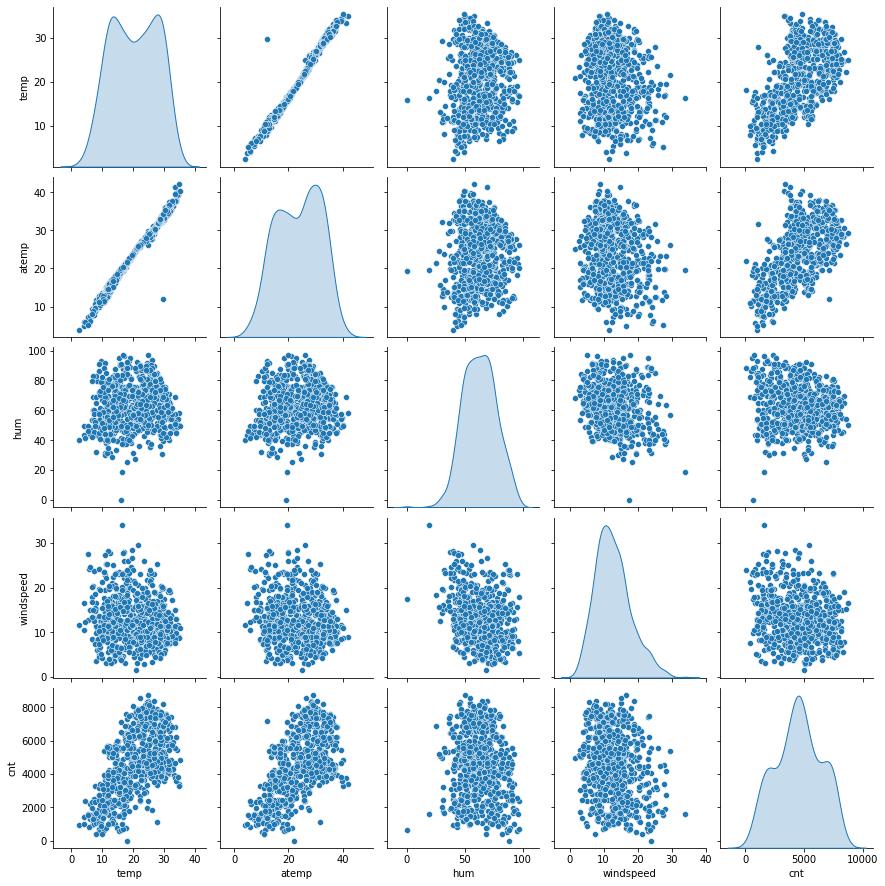

In [9]:
# Plot a pariplot to visualize the correlation between continuous variables

sns.pairplot(bike[cont_cols], diag_kind='kde')
plt.show()

### Observations:

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

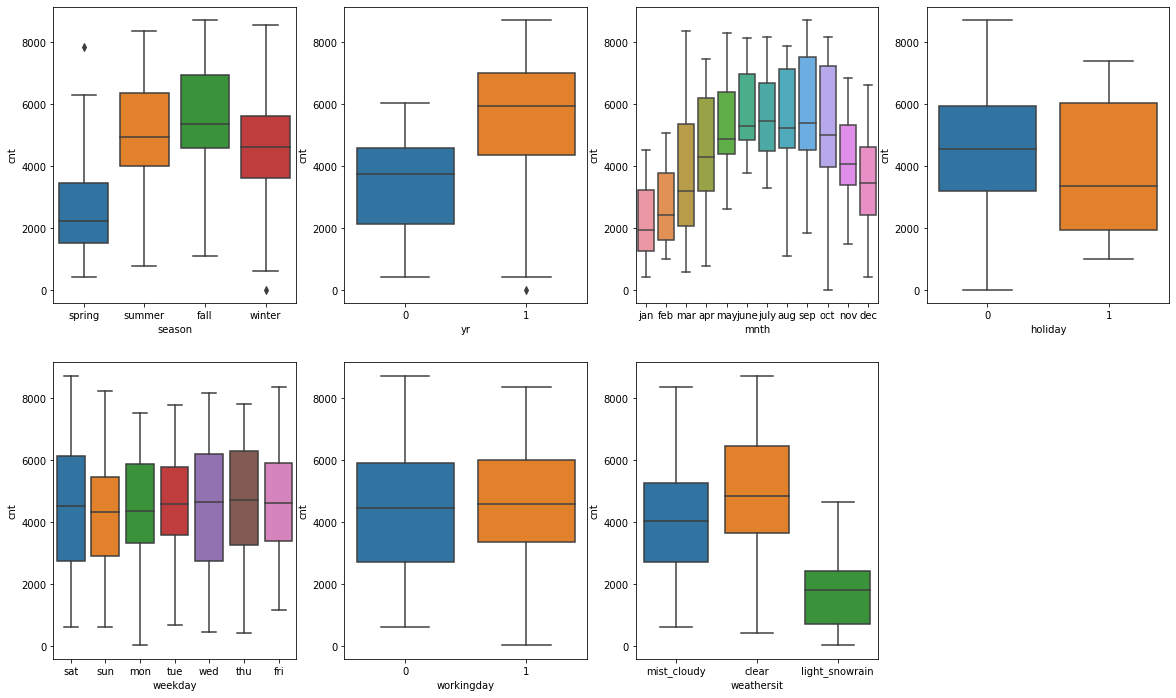

In [10]:
# Plot series of boxplots to visualize the correlation between categorical variables

plt.figure(figsize=(20,12))
for i in range(0, len(cat_cols)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=cat_cols[i], y='cnt', data=bike)
plt.show()

In [11]:
# Generic function to perform bivariate analysis to identify the correlation of variables against the target variables

def plot(col):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr')
    plt.legend(labels=['2018', '2019'])
    plt.show()

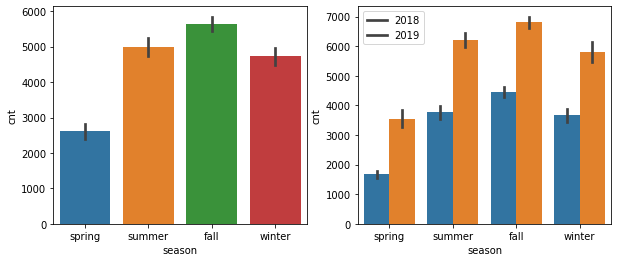

In [12]:
# Plot season against cnt column

plot('season')

More number of bookings made during fall and summer season and booking count has also increased drastically from 2018 to 2019.

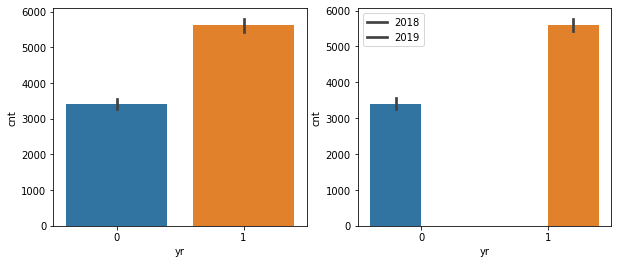

In [13]:
# Plot yr against cnt column

plot('yr')

No. of bookings made in 2019 is more when compared to 2018, which shows a good improvement in the business

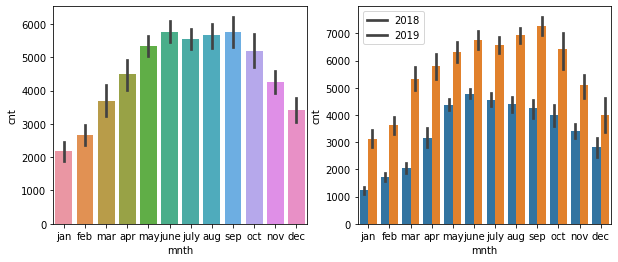

In [14]:
# Plot mnth against cnt column

plot('mnth')

Bookings made in months of may, june, july, aug, sep and oct are higher which shows the demand is high during these months.

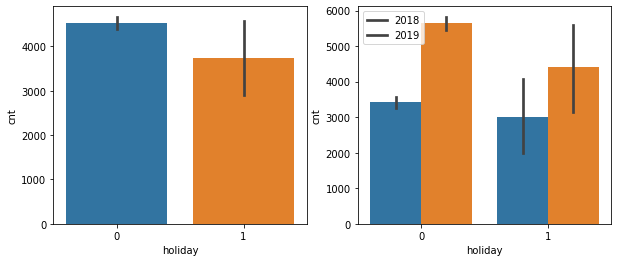

In [15]:
# Plot holiday against cnt column

plot('holiday')

No. of bookings in holiday is lesser when compared to the bookings made on working day.

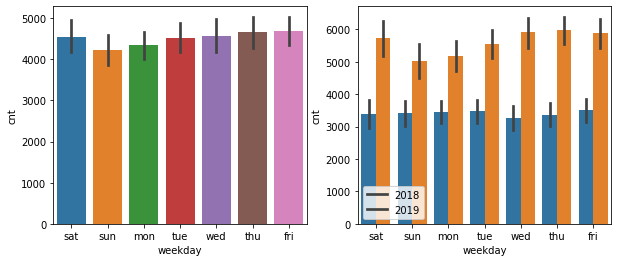

In [16]:
# Plot weekday against cnt column

plot('weekday')

No. of bookings at the beginning of the week is lesser when compared to the end of the week.

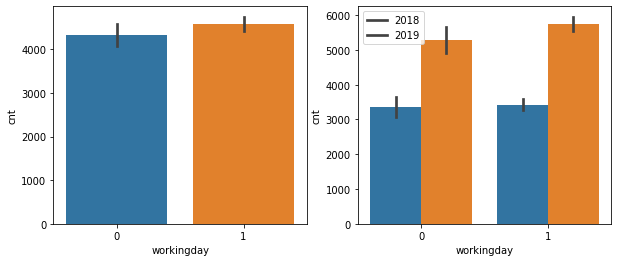

In [17]:
# Plot workingday against cnt column

plot('workingday')

Bookings made of working day and non-working day does not show much difference.

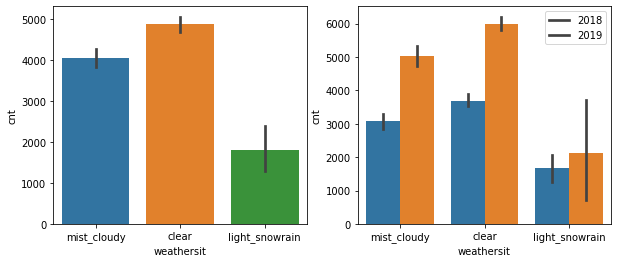

In [18]:
# Plot weathersit against cnt column

plot('weathersit')

More bookings has been made when the weather is clear, which seems obvious. Bookings has been increased in 2019 when comparing to 2018 and no bookings made during heavy_rain situation.

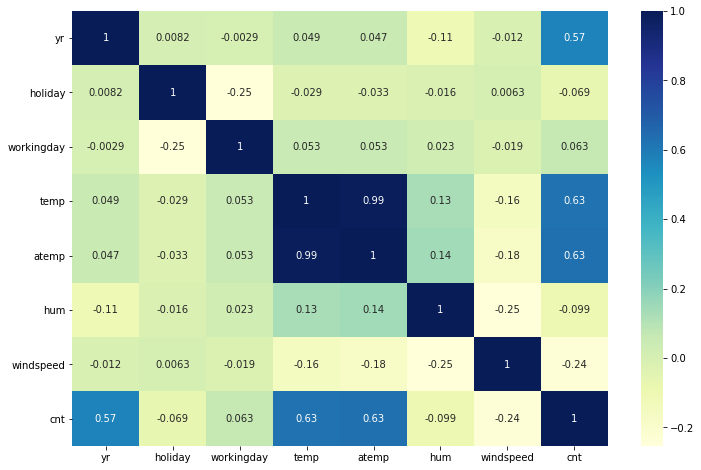

In [19]:
# Plotting a heatmap to see the corrleation of variables with the target variable

plt.figure(figsize= (12, 8))
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()

# 5. Data Preparation for modelling

In [20]:
# One hot encoding categorical variables

enc_cols = ['season', 'mnth', 'weekday', 'weathersit']
encoded_df = pd.DataFrame()
for i in enc_cols:
    df = pd.get_dummies(bike[i], drop_first=True)
    encoded_df = pd.concat([encoded_df, df], axis=1)

In [21]:
# Concatenating encoded variables with the dataframe and dropping original columns

bike.drop(columns=enc_cols, inplace=True)
bike = pd.concat([bike, encoded_df], axis=1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,mist_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## 5.1 Split data into train and test

In [22]:
# Split data into training and test data 

df_train, df_test = train_test_split(bike, random_state=42, test_size=0.3)
print(df_train.shape)
print(df_test.shape)

(511, 30)
(219, 30)


## 5.2 Scale numerical features using MinMaxScaler

In [23]:
# Scaling the numerical features in the training set

cont_cols = ['temp','atemp','hum','windspeed','cnt']
scaler = MinMaxScaler()
df_train[cont_cols] = scaler.fit_transform(df_train[cont_cols])
df_train[cont_cols].head()

,temp,atemp,hum,windspeed,cnt
683,0.327133,0.322150,0.639330,0.327101,0.605336
645,0.403972,0.404998,0.731215,0.419004,0.609320
163,0.717562,0.685963,0.509660,0.708724,0.554026
360,0.331287,0.326273,0.785745,0.415925,0.088253
640,0.745598,0.682653,0.817947,0.110593,0.862127


# 6. Training the model

In [24]:
# Prepare the training data and target variable as X_train and y_train

X_train = df_train.drop(['cnt'], axis=1)
y_train = df_train['cnt']
print(X_train.shape)
print(y_train.shape)

(511, 29)
(511,)


In [25]:
# Building a linear model 

lm = LinearRegression()
lm.fit(X_train, y_train)

# Selecting top 15 features using Recursive feature elimination 

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [26]:
# Display the selected features

features = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
features.sort(key=lambda y: y[2])
features

[('yr', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('winter', True, 1),
 ('dec', True, 1),
 ('july', True, 1),
 ('mar', True, 1),
 ('nov', True, 1),
 ('sep', True, 1),
 ('sat', True, 1),
 ('light_snowrain', True, 1),
 ('mist_cloudy', True, 1),
 ('workingday', False, 2),
 ('holiday', False, 3),
 ('may', False, 4),
 ('oct', False, 5),
 ('tue', False, 6),
 ('summer', False, 7),
 ('feb', False, 8),
 ('sun', False, 9),
 ('mon', False, 10),
 ('wed', False, 11),
 ('thu', False, 12),
 ('aug', False, 13),
 ('jan', False, 14),
 ('june', False, 15)]

In [27]:
# Adding the top 15 features to a list

rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'july', 'mar', 'nov', 'sep', 'sat', 'light_snowrain', 'mist_cloudy'],
      dtype='object')


## 6.1 Find the best model by evaluating p-value and VIF

In [28]:
# Generic function to calculate VIF of variables

def calc_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [29]:
# Custom function to print only the p-value, coefficients and VIF \
# from the statsodel summary table for better readability and interpretation

def get_model_summary(summary, df):
    data = summary.tables[1].data
    data[0][0] = 'Features'
    summary_df = pd.DataFrame(data[1:],columns=data[0])
    vif = calc_vif(df)
    summary_df = summary_df.merge(vif, on='Features', how='left')
    summary_df['P>|t|'] = summary_df['P>|t|'].astype(float)
    return summary_df

In [30]:
# Generic function train model

def train_model(X_train, y_train):
    X_train_sm = sm.add_constant(X_train)
    lr_model = sm.OLS(y_train,X_train_sm).fit()
    return lr_model

In [31]:
# Creating empty to list add features to be dropped

features_to_drop = []

In [32]:
# Create dataframe with RFE selected variables

X_train_rfe = X_train[rfe_cols]
X_train_rfe.shape

(511, 15)

### 6.1.1 Linear model Iteration - 1

In [33]:
# Building 1st linear regression model with all features

train_model(X_train_rfe, y_train).summary()
summary = train_model(X_train_rfe, y_train).summary()
summary_df = get_model_summary(summary, X_train_rfe)
summary_df.style.apply(lambda x: ["background: red" if v > 5 else "" for v in x], subset=['VIF']).apply(lambda x: ["background: red" if v > 0.05 else "" for v in x], subset=['P>|t|'])

,Features,coef,std err,t,P>|t|,[0.025,0.975],VIF
0,const,0.3296,0.037,8.905,0.000000,0.257,0.402,nan
1,yr,0.2368,0.009,27.575,0.000000,0.220,0.254,2.090000
2,temp,0.0227,0.245,0.093,0.926000,-0.459,0.505,1197.150000
3,atemp,0.4491,0.262,1.711,0.088000,-0.067,0.965,1226.470000
4,hum,-0.1688,0.040,-4.169,0.000000,-0.248,-0.089,25.470000
5,windspeed,-0.1135,0.026,-4.389,0.000000,-0.164,-0.063,5.380000
6,spring,-0.1575,0.017,-9.215,0.000000,-0.191,-0.124,2.720000
7,winter,0.0899,0.014,6.198,0.000000,0.061,0.118,2.760000
8,dec,-0.0640,0.018,-3.506,0.000000,-0.100,-0.028,1.370000
9,july,-0.0592,0.017,-3.474,0.001000,-0.093,-0.026,1.490000


#### Observations:

- R-squared - 0.839
- Adj. R-squared:	0.834
- As variable 'atemp' has a high VIF drop the feature in next iteration

### 6.1.2 Linear model Iteration - 2

In [34]:
features_to_drop.append('atemp')
features_to_drop

['atemp']

In [35]:
# Train 2nd linear model 

X_train_lm_2 = X_train_rfe.drop(features_to_drop, axis = 1)
summary = train_model(X_train_lm_2, y_train).summary()
summary_df = get_model_summary(summary, X_train_lm_2)
summary_df.style.apply(lambda x: ["background: red" if v > 5 else "" for v in x], subset=['VIF']).apply(lambda x: ["background: red" if v > 0.05 else "" for v in x], subset=['P>|t|'])

,Features,coef,std err,t,P>|t|,[0.025,0.975],VIF
0,const,0.3376,0.037,9.180,0.000000,0.265,0.410,nan
1,yr,0.2369,0.009,27.530,0.000000,0.220,0.254,2.090000
2,temp,0.4384,0.035,12.505,0.000000,0.370,0.507,16.950000
3,hum,-0.1610,0.040,-3.995,0.000000,-0.240,-0.082,23.940000
4,windspeed,-0.1246,0.025,-4.968,0.000000,-0.174,-0.075,5.120000
5,spring,-0.1602,0.017,-9.399,0.000000,-0.194,-0.127,2.720000
6,winter,0.0916,0.014,6.317,0.000000,0.063,0.120,2.730000
7,dec,-0.0633,0.018,-3.463,0.001000,-0.099,-0.027,1.370000
8,july,-0.0598,0.017,-3.506,0.000000,-0.093,-0.026,1.490000
9,mar,0.0545,0.018,2.968,0.003000,0.018,0.091,1.170000


#### Observations:

- R-squared - 0.838
- Adj. R-squared:	0.833
- We cannot drop feature temp due to high VIF due to the general idea that temperature affects bike demand and it is important for the prediction. So we will drop the feature 'hum' with the second highest VIF and see the temp VIF reduces.

### 6.1.3 Linear model Iteration - 3

In [36]:
features_to_drop.append('hum')
features_to_drop

['atemp', 'hum']

In [37]:
# As humidity has a high VIF drop the feature and train 3rd linear model

X_train_lm_3 = X_train_rfe.drop(features_to_drop, axis = 1)
summary = train_model(X_train_lm_3, y_train).summary()
summary_df = get_model_summary(summary, X_train_lm_3)
summary_df.style.apply(lambda x: ["background: red" if v > 5 else "" for v in x], subset=['VIF']).apply(lambda x: ["background: red" if v > 0.05 else "" for v in x], subset=['P>|t|'])

,Features,coef,std err,t,P>|t|,[0.025,0.975],VIF
0,const,0.2433,0.029,8.502,0.000000,0.187,0.300,nan
1,yr,0.2417,0.009,27.956,0.000000,0.225,0.259,2.090000
2,temp,0.4143,0.035,11.821,0.000000,0.345,0.483,5.450000
3,windspeed,-0.0953,0.024,-3.914,0.000000,-0.143,-0.047,5.080000
4,spring,-0.1632,0.017,-9.444,0.000000,-0.197,-0.129,1.800000
5,winter,0.0860,0.015,5.876,0.000000,0.057,0.115,2.380000
6,dec,-0.0680,0.019,-3.670,0.000000,-0.104,-0.032,1.330000
7,july,-0.0541,0.017,-3.132,0.002000,-0.088,-0.020,1.440000
8,mar,0.0590,0.019,3.168,0.002000,0.022,0.096,1.170000
9,nov,-0.0833,0.020,-4.267,0.000000,-0.122,-0.045,1.790000


#### Observations:

- R-squared - 0.832
- Adj. R-squared:	0.828
- As variable 'sat' has a high p-value drop the feature in next iteration

### 6.1.4 Linear model Iteration - 4

In [38]:
features_to_drop.append('sat')
features_to_drop

['atemp', 'hum', 'sat']

In [39]:
# As sat has a high p-value drop the feature and train 4th linear model

X_train_lm_4 = X_train_rfe.drop(features_to_drop, axis = 1)
summary = train_model(X_train_lm_4, y_train).summary()
summary_df = get_model_summary(summary, X_train_lm_4)
summary_df.style.apply(lambda x: ["background: red" if v > 5 else "" for v in x], subset=['VIF']).apply(lambda x: ["background: red" if v > 0.05 else "" for v in x], subset=['P>|t|'])

,Features,coef,std err,t,P>|t|,[0.025,0.975],VIF
0,const,0.2477,0.028,8.691,0.000000,0.192,0.304,nan
1,yr,0.2418,0.009,27.936,0.000000,0.225,0.259,2.090000
2,temp,0.4115,0.035,11.743,0.000000,0.343,0.480,5.420000
3,windspeed,-0.0942,0.024,-3.865,0.000000,-0.142,-0.046,5.040000
4,spring,-0.1645,0.017,-9.519,0.000000,-0.198,-0.131,1.800000
5,winter,0.0852,0.015,5.818,0.000000,0.056,0.114,2.380000
6,dec,-0.0677,0.019,-3.649,0.000000,-0.104,-0.031,1.330000
7,july,-0.0542,0.017,-3.133,0.002000,-0.088,-0.020,1.440000
8,mar,0.0572,0.019,3.074,0.002000,0.021,0.094,1.170000
9,nov,-0.0832,0.020,-4.258,0.000000,-0.122,-0.045,1.790000


#### Observations:

- R-squared - 0.832
- Adj. R-squared:	0.828
- As variable 'windspeed' has a high VIF drop the feature in next iteration as we cannot drop atemp which has higher significance for the prediction

### 6.1.5 Linear model Iteration - 5

In [40]:
features_to_drop.append('windspeed')
features_to_drop

['atemp', 'hum', 'sat', 'windspeed']

In [41]:
# As windspeed has a high VIF drop the feature and train 5th linear model

X_train_lm_5 = X_train_rfe.drop(features_to_drop, axis = 1)
summary = train_model(X_train_lm_5, y_train).summary()
summary_df = get_model_summary(summary, X_train_lm_5)
summary_df.style.apply(lambda x: ["background: red" if v > 5 else "" for v in x], subset=['VIF']).apply(lambda x: ["background: red" if v > 0.05 else "" for v in x], subset=['P>|t|'])

,Features,coef,std err,t,P>|t|,[0.025,0.975],VIF
0,const,0.1936,0.025,7.690,0.000000,0.144,0.243,nan
1,yr,0.2413,0.009,27.502,0.000000,0.224,0.259,2.070000
2,temp,0.4318,0.035,12.295,0.000000,0.363,0.501,2.980000
3,spring,-0.1603,0.017,-9.167,0.000000,-0.195,-0.126,1.380000
4,winter,0.0945,0.015,6.451,0.000000,0.066,0.123,2.370000
5,dec,-0.0616,0.019,-3.290,0.001000,-0.098,-0.025,1.330000
6,july,-0.0510,0.018,-2.914,0.004000,-0.085,-0.017,1.400000
7,mar,0.0599,0.019,3.178,0.002000,0.023,0.097,1.170000
8,nov,-0.0836,0.020,-4.223,0.000000,-0.123,-0.045,1.750000
9,sep,0.0516,0.016,3.202,0.001000,0.020,0.083,1.230000


#### Observations:

- R-squared - 0.827
- Adj. R-squared:	0.823

### We can cosider the above 5th iteration with training set X_train_lm_5, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant

# 7. Residual Analysis

In [42]:
# Train a linear model with the identified features in iteration 5

lr_model = train_model(X_train_lm_5, y_train)

In [43]:
# Adding constant to X_train when training using statsmodels and predict on the training set

X_train_sm = sm.add_constant(X_train_lm_5)
y_train_pred = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

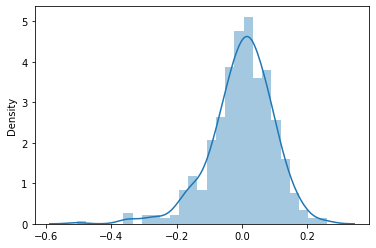

In [44]:
# Plot the residuals to check if the assumptions of linear regression is true

res = y_train - y_train_pred
sns.distplot(res)

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

# 8. Evaluation and Prediction on Test Set

In [45]:
# Scale the test set on the scaler fitted on training set 

df_test_scaled = df_test.copy()
df_test_scaled[cont_cols] = scaler.transform(df_test_scaled[cont_cols])


In [46]:
# Create test set and the target variable

X_test = df_test_scaled.drop(['cnt'], axis=1)
y_test = df_test_scaled['cnt']
print(X_test.shape)
print(y_test.shape)

(219, 29)
(219,)


In [47]:
# Filter only for the rfe selected features in test set

X_test_rfe = X_test[rfe_cols]

# Dropping features with high p-value and high VIF in the test set

X_test_rfe.drop(columns=features_to_drop, inplace=True)
X_test_rfe.shape

(219, 11)

In [48]:
# Add a constant to the test set

X_test_sm = sm.add_constant(X_test_rfe)

In [49]:
# Predict on the trained model

y_test_pred = lr_model.predict(X_test_sm)

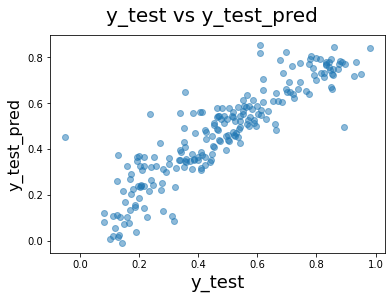

In [50]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)            
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

### Model Metrics

In [51]:
# R2 score for the final linear model

r2 = r2_score(y_test, y_test_pred)

In [52]:
# Adjusted R2 score for the final linear model

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [53]:
print('Training R-Squared is 0.827')
print('Training Adjusted R-Squared is 0.823')
print(f'Test R-Squared is {round(r2, 3)}')
print(f'Test Adjusted R-Squared is {round(adj_r2, 3)}')

Training R-Squared is 0.827
Training Adjusted R-Squared is 0.823
Test R-Squared is 0.805
Test Adjusted R-Squared is 0.775


In [54]:
# Statistical summary of the final model

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.4
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          6.34e-182
Time:                        14:15:50   Log-Likelihood:                 465.38
No. Observations:                 511   AIC:                            -906.8
Df Residuals:                     499   BIC:                            -855.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1936      0.025      7.690      0.000       0.144       0.243
yr                 0.2413      0.009     27.502      0.000       0.224       0.259
temp               0.4318      0.035     12.295      0.000       0.363       0.501
spring            -0.1603      0.017     -9.167      0.000      -0.195      -0.126
winter             0.0945      0.015      6.451      0.000       0.066       0.123
dec               -0.0616      0.019     -3.290      0.001      -0.098      -0.025
july              -0.0510      0.018     -2.914      0.004      -0.085      -0.017
mar                0.0599      0.019      3.178      0.002       0.023       0.097
nov               -0.0836      0.020     -4.223      0.000      -0.123      -0.045
sep                0.0516      0.016      3.202      0.001       0.020       0.083
light_snowrain    -0.2846      0.026    -10.750      0.000      -0.337      -0.233
mist_cloudy       -0.0844      0.009     -8.976      0.000      -0.103      -0.066
==============================================================================
Omnibus:                       79.894   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.293
Skew:                          -0.858   Prob(JB):                     4.71e-37
Kurtosis:                       5.216   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 9. Conclusion:

As per the final model prediction and evaluation, the top 3 predictor variables that influences the bike booking are:

- <b>Temperature</b> (temp) - A coefficient value of <b>‘0.4318’</b> indicated that a unit increase in temp variable increases the bike hire numbers by 0.4318 units.
- <b>Weather Situation 3</b> (light_snowrain) - A coefficient value of <b>‘-0.2846’</b> indicated that, w.r.t Weathersit3, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2846 units.
- <b>Year</b> (yr) - A coefficient value of <b>‘0.2413’</b> indicated that a unit increase in yr variable increases the bike hire numbers by 0.2413 units.

### It is recommended to give maximum importance to the above variables to meet the demand for bike bookings.